In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import defaultdict
from shutil import copy, copytree, rmtree
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

In [2]:
# Check TensorFlow version and GPU
print(tf.__version__)
print(tf.test.gpu_device_name())

2.15.0



In [3]:
# Helper function to check the dataset folder
def check_data():
    if os.path.exists(r'C:\Users\Dell.com\Desktop\images') and os.path.exists(r'C:\Users\Dell.com\Desktop\meta'):
        print("Dataset exists")
    else:
        raise FileNotFoundError("Dataset not found. Please ensure the 'food-101' folder is in the current directory.")

In [4]:
# Check the dataset folder
check_data()

Dataset exists


In [5]:
# Check the extracted dataset folder
print(os.listdir(r'C:\Users\Dell.com\Desktop\images'))
print(os.listdir(r'C:\Users\Dell.com\Desktop\meta'))

['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [6]:
with open(r'C:\Users\Dell.com\Desktop\meta\train.txt') as f:
    for _ in range(5):
        print(f.readline().strip())

with open(r'C:\Users\Dell.com\Desktop\meta\classes.txt') as f:
    for _ in range(5):
        print(f.readline().strip())

apple_pie/1005649


apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare


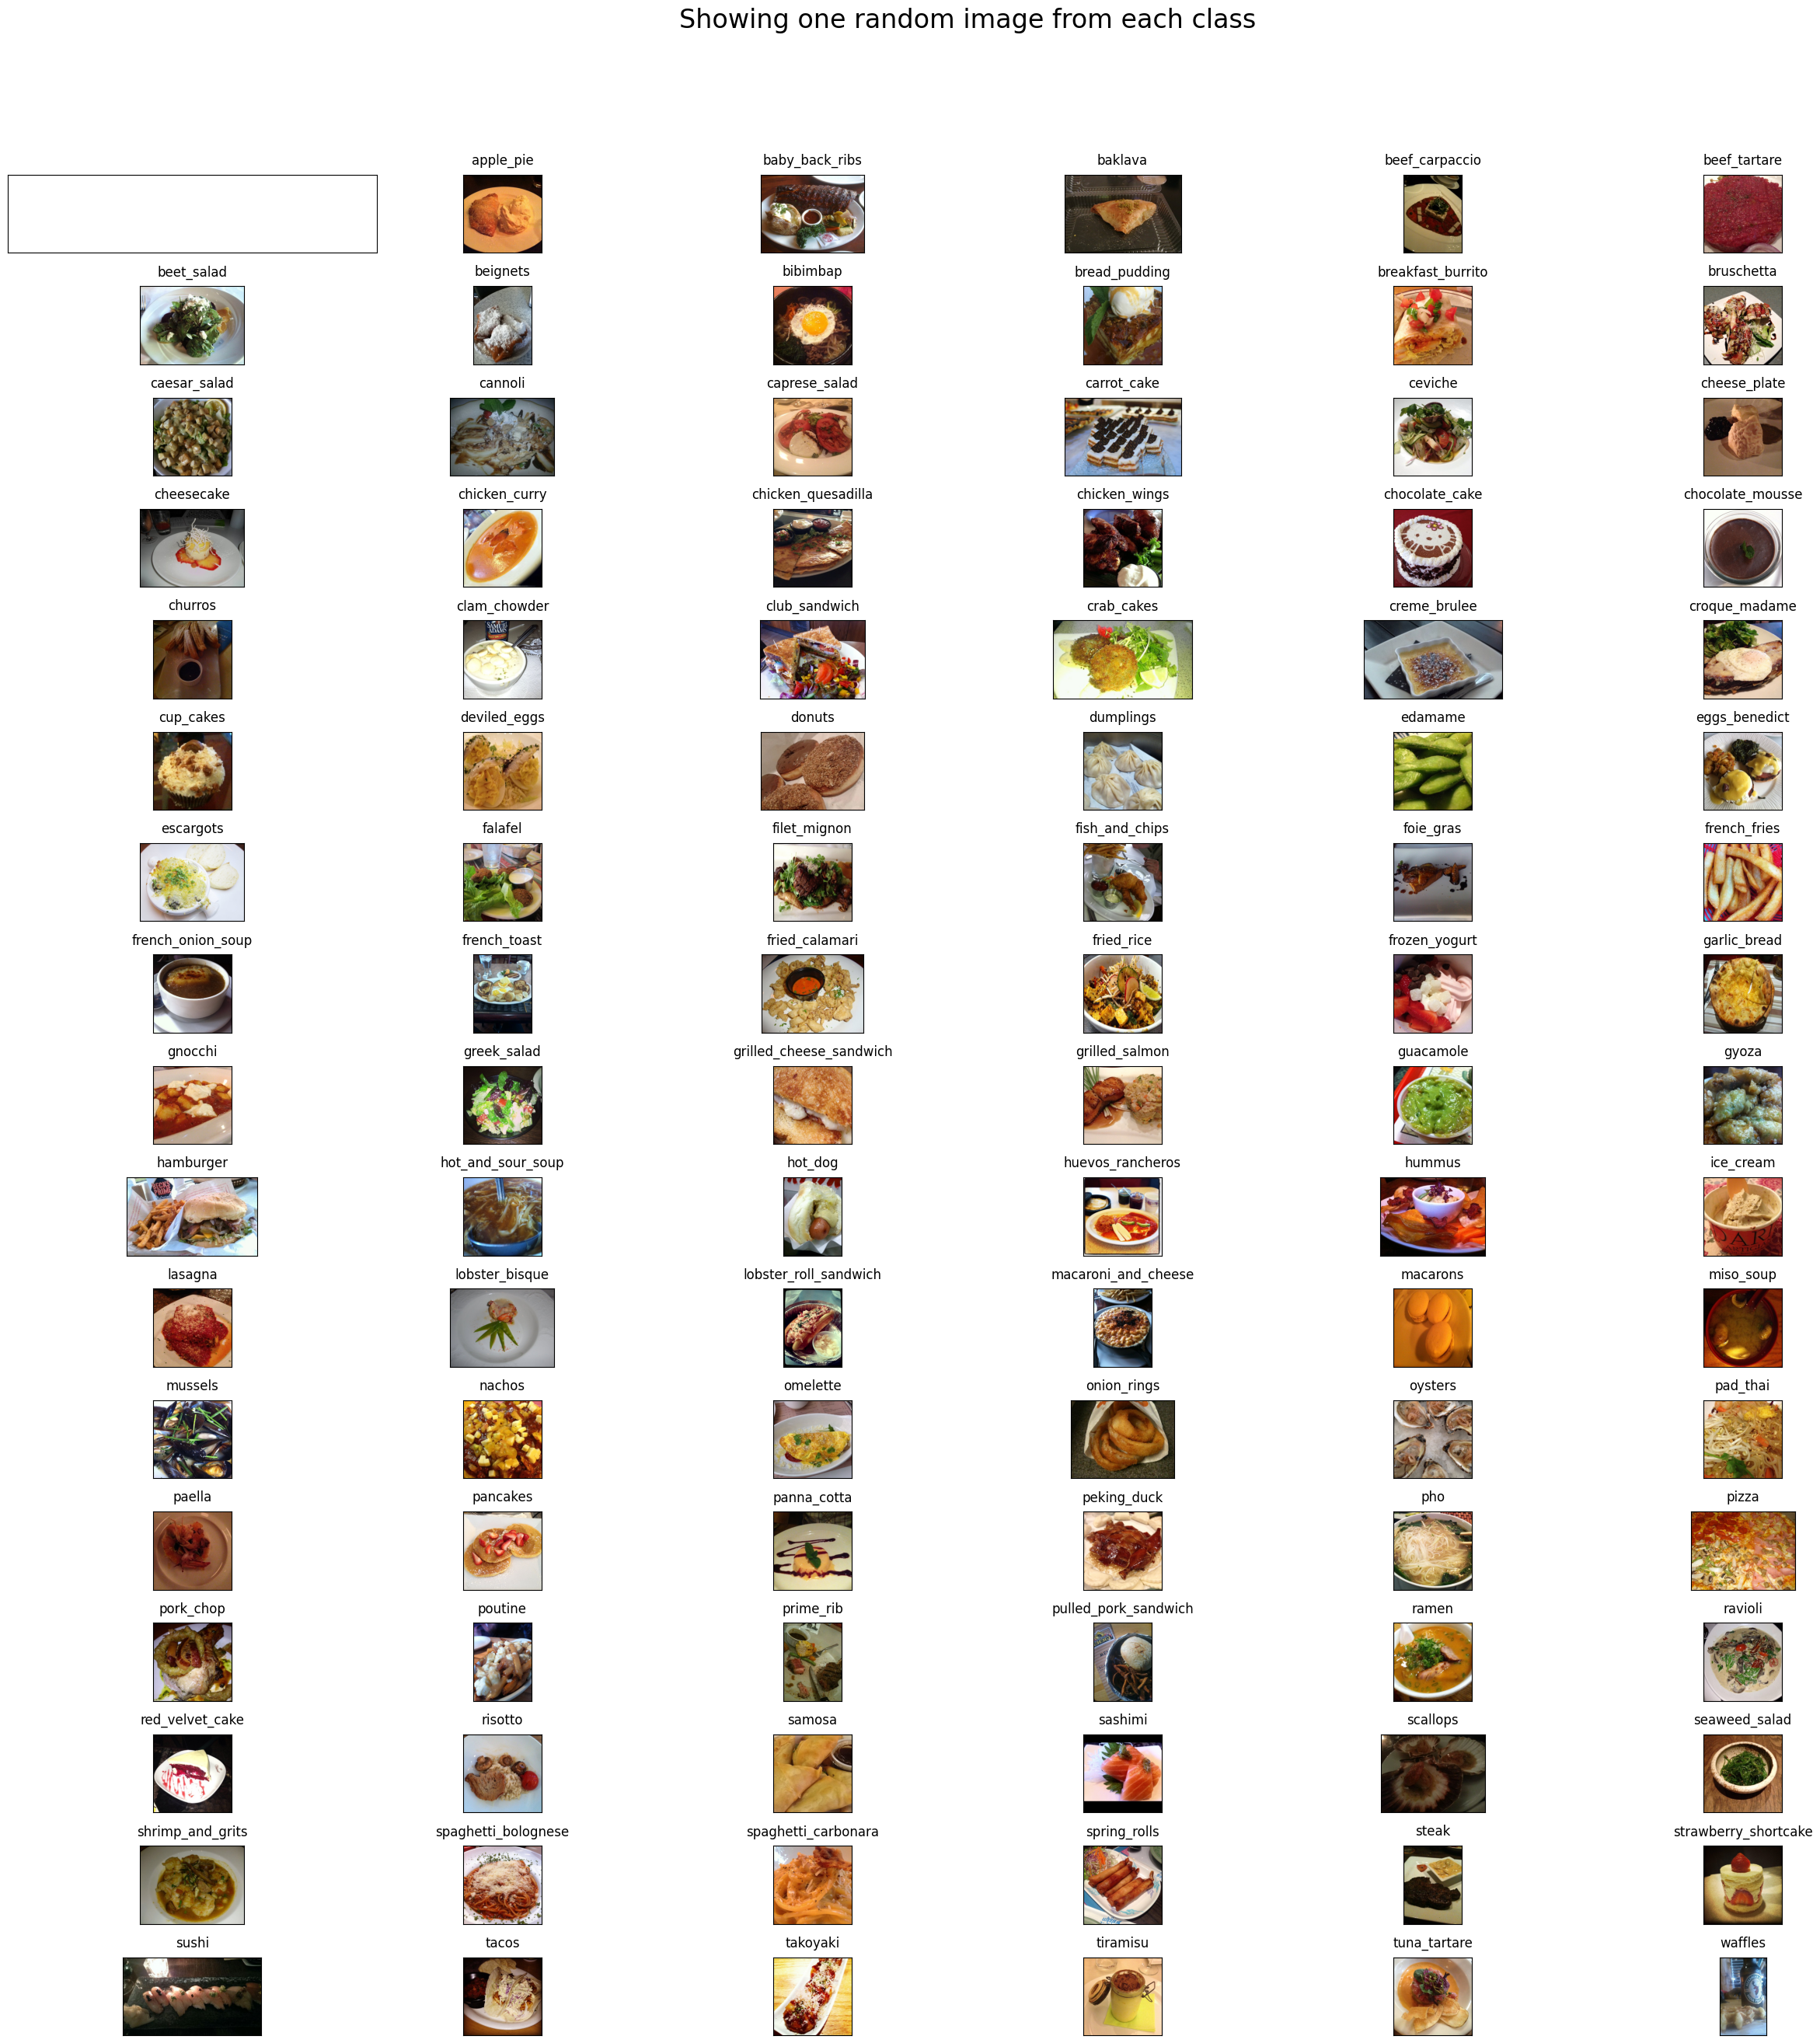

In [7]:
# Visualize data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25, 25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24)
data_dir = r"C:\Users\Dell.com\Desktop\images"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0

for i in range(rows):
    for j in range(cols):
        try:
            food_selected = foods_sorted[food_id]
            food_id += 1
        except:
            break
        if food_selected == '.DS_Store':
            continue
        food_selected_images = os.listdir(os.path.join(data_dir, food_selected))
        food_selected_random = np.random.choice(food_selected_images)
        img = plt.imread(os.path.join(data_dir, food_selected, food_selected_random))
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_selected, pad=10)
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()


In [8]:
# Helper function to split dataset into train and test folders
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
    for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')
    for food in classes_images.keys():
        print("\nCopying images into ", food)
        if not os.path.exists(os.path.join(dest, food)):
            os.makedirs(os.path.join(dest, food))
        for i in classes_images[food]:
            copy(os.path.join(src, food, i), os.path.join(dest, food, i))
    print("Copying Done!")

In [9]:
# Prepare train dataset
print("Creating train data...")
prepare_data(r'C:\Users\Dell.com\Desktop\meta\train.txt', r'C:\Users\Dell.com\Desktop\images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [10]:
# Prepare test dataset
print("Creating test data...")
prepare_data(r'C:\Users\Dell.com\Desktop\meta\test.txt', r'C:\Users\Dell.com\Desktop\images', 'test')


Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [11]:
import os

def count_files(directory):
    try:
        # List all files in the directory
        files = os.listdir(directory)
        # Filter out directories, only count files
        num_files = sum([1 for file in files if os.path.isfile(os.path.join(directory, file))])
        return num_files
    except FileNotFoundError:
        print(f"The directory {directory} does not exist.")
        return 0




In [12]:
# Check number of samples in train folder
print("Total number of samples in train folder")
os.system(r"C:\Users\Dell.com\Desktop\ml\project 9\train")

Total number of samples in train folder


1

In [13]:
# List of all 101 types of foods
del foods_sorted[0]
print(foods_sorted)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [14]:
# Helper function to create mini datasets
def dataset_mini(food_list, src, dest):
    if os.path.exists(dest):
        rmtree(dest)  # Remove existing mini dataset folder
    os.makedirs(dest)
    for food_item in food_list:
        print("Copying images into", food_item)
        copytree(os.path.join(src, food_item), os.path.join(dest, food_item))

In [15]:
# Generate mini dataset with 3 classes
food_list = ['apple_pie', 'pizza', 'omelette']
src_train = 'train'
dest_train = 'train_mini/'
src_test = 'test'
dest_test = 'test_mini/'
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [16]:
# Generate mini dataset for test data
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [17]:
# Check number of samples in mini datasets
print("Total number of samples in train_mini folder:", count_files('train_mini'))
print("Total number of samples in test_mini folder:", count_files('test_mini'))

Total number of samples in train_mini folder: 0
Total number of samples in test_mini folder: 0


In [18]:
# Load pretrained ResNet50 model and fine-tune
tf.keras.backend.clear_session()
n_classes = 3
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

resnet50 = ResNet50(weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    epochs=30,
    verbose=1,
    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')
class_map_3 = train_generator.class_indices
print(class_map_3)


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.

Epoch 1/30


140/140 [==============================] - ETA: 0s - loss: 1.0366 - accuracy: 0.5103
Epoch 1: val_loss improved from inf to 1.70210, saving model to best_model_3class.hdf5


C:\Users\Dell.com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/140 [==============================] - 165s 1s/step - loss: 1.0366 - accuracy: 0.5103 - val_loss: 1.7021 - val_accuracy: 0.3329
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.7180
Epoch 2: val_loss did not improve from 1.70210
140/140 [==============================] - 155s 1s/step - loss: 0.7287 - accuracy: 0.7180 - val_loss: 2.9646 - val_accuracy: 0.3342
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7775
Epoch 3: val_loss did not improve from 1.70210
140/140 [==============================] - 156s 1s/step - loss: 0.5904 - accuracy: 0.7775 - val_loss: 2.8978 - val_accuracy: 0.3315
Epoch 4/30
140/140 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.8254
Epoch 4: val_loss did not improve from 1.70210
140/140 [==============================] - 160s 1s/step - loss: 0.5092 - accuracy: 0.8254 - val_loss: 2.9945 - val_accuracy: 0.3356
Epoch 5/30
140/140 [=======================

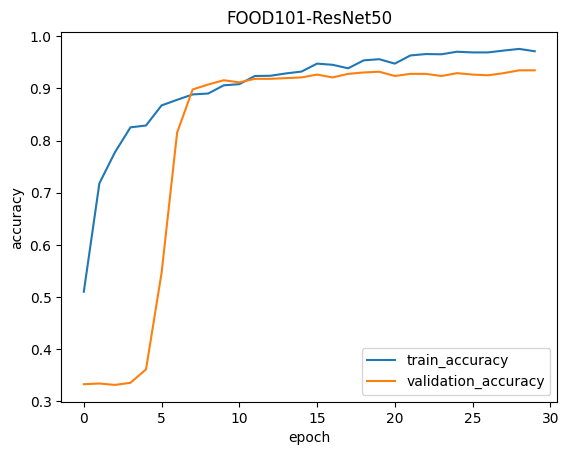

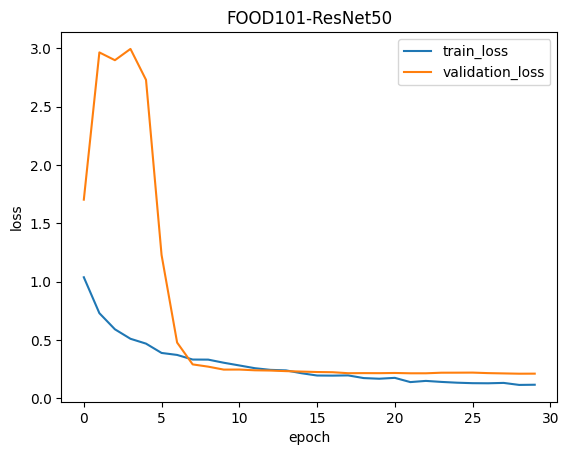

In [19]:
# Helper functions for plotting accuracy and loss
def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

plot_accuracy(history, 'FOOD101-ResNet50')
plot_loss(history, 'FOOD101-ResNet50')

In [20]:
# Loading the best saved model to make predictions
tf.keras.backend.clear_session()
model_best = load_model(r'C:\Users\Dell.com\Desktop\ml\project 9\best_model_3class.hdf5', compile=False)

In [21]:
# Helper function to predict class from images
def predict_class(model, images, show=True):
    for img_path in images:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.
        pred = model.predict(img_array)
        index = np.argmax(pred)
        food_list.sort()
        pred_value = food_list[index]
        if show:
            plt.imshow(img_array[0])
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

1/1 [==============================] - 1s 812ms/step


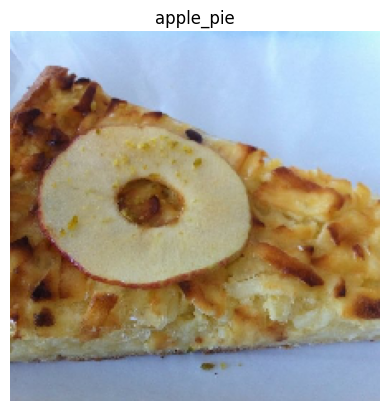

1/1 [==============================] - 0s 68ms/step


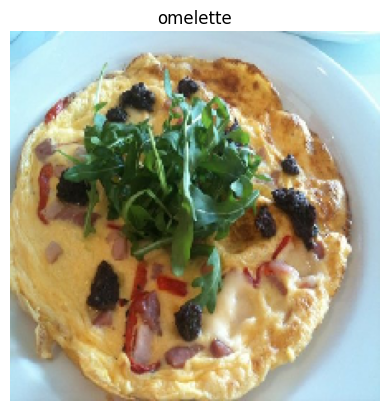

1/1 [==============================] - 0s 62ms/step


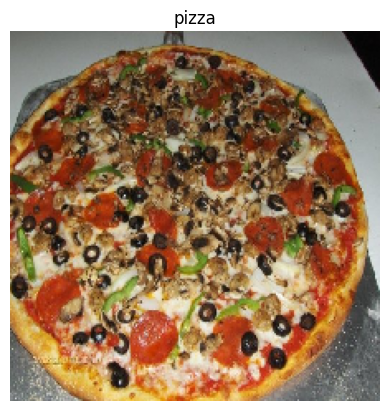

In [22]:
# Make a list of images from the test_mini directory and test the trained model
images = []
images.append(r"C:\Users\Dell.com\Desktop\ml\project 9\test_mini\apple_pie\484947.jpg")
images.append(r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\omelette\73939.jpg')
images.append(r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\pizza\148765.jpg')
predict_class(model_best, images, True)


In [23]:
# Helper function to select n random food classes
def pick_n_random_classes(n):
    food_list = []
    random_food_indices = random.sample(range(len(foods_sorted)), n)
    for i in random_food_indices:
        food_list.append(foods_sorted[i])
    food_list.sort()
    return food_list

In [24]:
# Pick more classes randomly
n = 11
food_list = pick_n_random_classes(n)
food_list = ['apple_pie', 'beef_carpaccio', 'bibimbap', 'cup_cakes', 'foie_gras', 'french_fries', 'garlic_bread', 'pizza', 'spring_rolls', 'spaghetti_carbonara', 'strawberry_shortcake']
print("These are the randomly picked food classes we will be training the model on...\n", food_list)

These are the randomly picked food classes we will be training the model on...
 ['apple_pie', 'beef_carpaccio', 'bibimbap', 'cup_cakes', 'foie_gras', 'french_fries', 'garlic_bread', 'pizza', 'spring_rolls', 'spaghetti_carbonara', 'strawberry_shortcake']


In [25]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)
print("Creating test data folder with new classes...")
dataset_mini(food_list, src_test, dest_test)

Creating training data folder with new classes...
Copying images into apple_pie
Copying images into beef_carpaccio
Copying images into bibimbap
Copying images into cup_cakes
Copying images into foie_gras
Copying images into french_fries
Copying images into garlic_bread
Copying images into pizza
Copying images into spring_rolls
Copying images into spaghetti_carbonara
Copying images into strawberry_shortcake
Creating test data folder with new classes...
Copying images into apple_pie
Copying images into beef_carpaccio
Copying images into bibimbap
Copying images into cup_cakes
Copying images into foie_gras
Copying images into french_fries
Copying images into garlic_bread
Copying images into pizza
Copying images into spring_rolls
Copying images into spaghetti_carbonara
Copying images into strawberry_shortcake


In [26]:
print("Total number of samples in train_mini folder:", count_files(r"C:\Users\Dell.com\Desktop\ml\project 9\train_mini"))
print("Total number of samples in test_mini folder:", count_files(r"C:\Users\Dell.com\Desktop\ml\project 9\test_mini"))

Total number of samples in train_mini folder: 0
Total number of samples in test_mini folder: 0


Found 8250 images belonging to 11 classes.
Found 2750 images belonging to 11 classes.
Epoch 1/30
515/515 [==============================] - ETA: 0s - loss: 1.9659 - accuracy: 0.3844
Epoch 1: val_loss improved from inf to 2.60287, saving model to best_model_11class.hdf5
515/515 [==============================] - 583s 1s/step - loss: 1.9659 - accuracy: 0.3844 - val_loss: 2.6029 - val_accuracy: 0.1202
Epoch 2/30
515/515 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.6889
Epoch 2: val_loss improved from 2.60287 to 0.74517, saving model to best_model_11class.hdf5
515/515 [==============================] - 576s 1s/step - loss: 1.1156 - accuracy: 0.6889 - val_loss: 0.7452 - val_accuracy: 0.7931
Epoch 3/30
515/515 [==============================] - ETA: 0s - loss: 0.8681 - accuracy: 0.7592
Epoch 3: val_loss improved from 0.74517 to 0.54344, saving model to best_model_11class.hdf5
515/515 [==============================] - 577s 1s/step - loss: 0.8681 - accuracy: 0.7592 

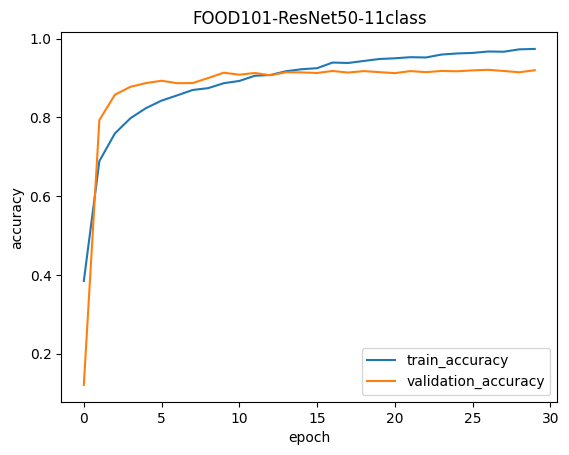

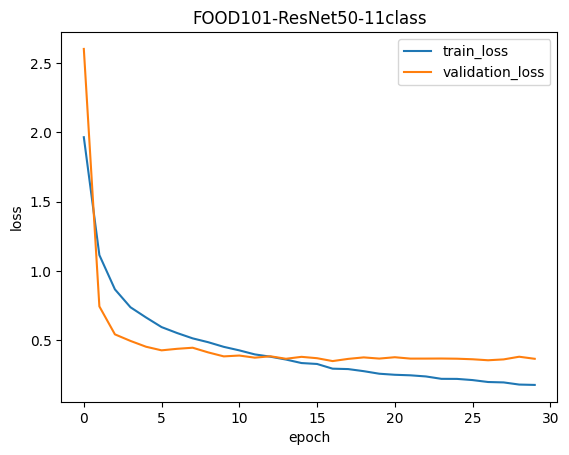

In [27]:
from tensorflow.keras import backend as K
K.clear_session()
n_classes = n
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 8250
nb_validation_samples = 2750
batch_size = 16

train_datagen = ImageDataGenerator(
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

resnet50 = ResNet50(weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_11class.log')

history_11class = model.fit(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size,
epochs=30,
verbose=1,
callbacks=[csv_logger, checkpointer])

model.save('model_trained_11class.hdf5')
class_map_11 = train_generator.class_indices
print(class_map_11)

plot_accuracy(history_11class, 'FOOD101-ResNet50-11class')
plot_loss(history_11class, 'FOOD101-ResNet50-11class')



In [28]:
class_map_11 = train_generator.class_indices
class_map_11

{'apple_pie': 0,
 'beef_carpaccio': 1,
 'bibimbap': 2,
 'cup_cakes': 3,
 'foie_gras': 4,
 'french_fries': 5,
 'garlic_bread': 6,
 'pizza': 7,
 'spaghetti_carbonara': 8,
 'spring_rolls': 9,
 'strawberry_shortcake': 10}

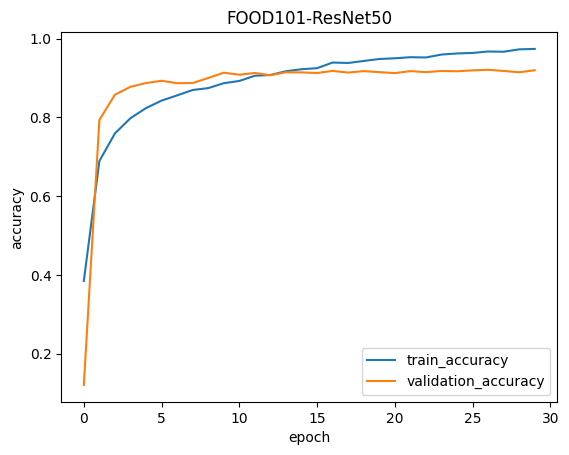

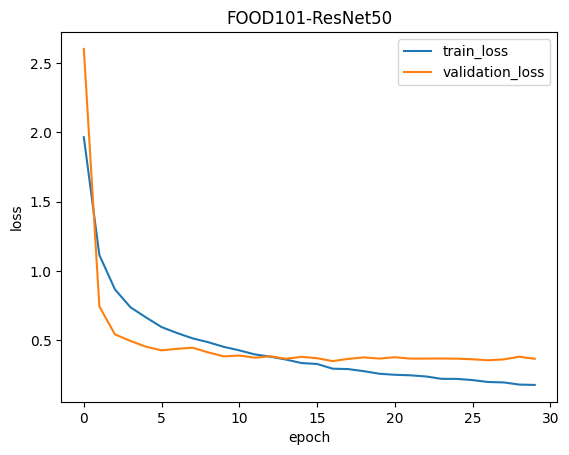

In [29]:
plot_accuracy(history_11class,'FOOD101-ResNet50')
plot_loss(history_11class,'FOOD101-ResNet50')

In [32]:
K.clear_session()
model_best = load_model(r'', compile=False)C:\Users\Dell.com\Desktop\ml\project 9\model_trained_11class.hdf5

1/1 [==============================] - 1s 694ms/step


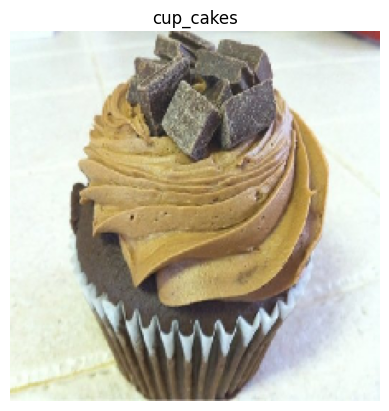

1/1 [==============================] - 0s 58ms/step


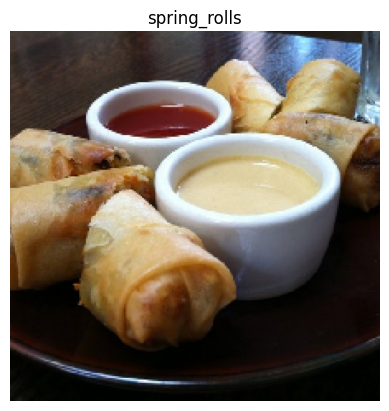

1/1 [==============================] - 0s 55ms/step


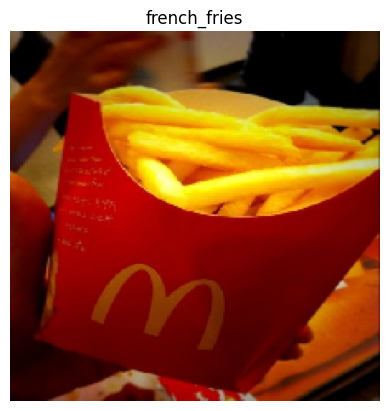

In [35]:
images = [r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\cup_cakes\91387.jpg',r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\spring_rolls\611834.jpg',r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\french_fries\204100.jpg'] 
predict_class(model_best, images, True)

In [97]:
# Calorie dictionary for food classes
calorie_dict = {
    'apple_pie': 300,
    'beef_carpaccio': 250,
    'bibimbap': 400,
    'cup_cakes': 450,
    'foie_gras': 550,
    'french_fries': 365,
    'garlic_bread': 200,
    'pizza': 285,
    'spring_rolls': 100,
    'spaghetti_carbonara': 400,
    'strawberry_shortcake': 300,
}

# Define class map
class_map = {
    'apple_pie': 0,
    'beef_carpaccio': 1,
    'bibimbap': 2,
    'cup_cakes': 3,
    'foie_gras': 4,
    'french_fries': 5,
    'garlic_bread': 6,
    'pizza': 7,
    'spring_rolls': 8,
    'spaghetti_carbonara': 9,
    'strawberry_shortcake': 10,
}

In [98]:
# Load the best model
model_best = load_model(r'C:\Users\Dell.com\Desktop\ml\project 9\model_trained_11class.hdf5')


In [99]:
# Function to predict class and estimate calories
def predict_class_and_calories(model, images, show=True):
    for img_path in images:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.
        pred = model.predict(img_array)
        index = np.argmax(pred)
        predicted_class = list(class_map.keys())[list(class_map.values()).index(index)]
        predicted_calories = calorie_dict[predicted_class]
        if show:
            plt.imshow(img_array[0])
            plt.axis('off')
            plt.title(f"{predicted_class} - {predicted_calories} kcal")
            plt.show()
        print(f"Predicted: {predicted_class}, Estimated Calories: {predicted_calories} kcal")

1/1 [==============================] - 1s 707ms/step


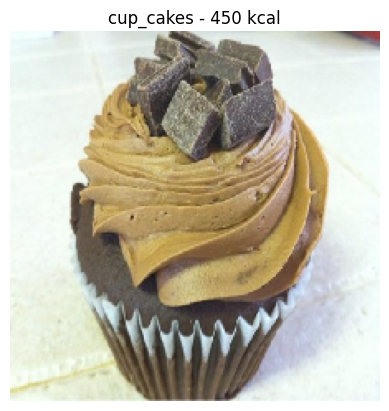

Predicted: cup_cakes, Estimated Calories: 450 kcal
1/1 [==============================] - 0s 59ms/step


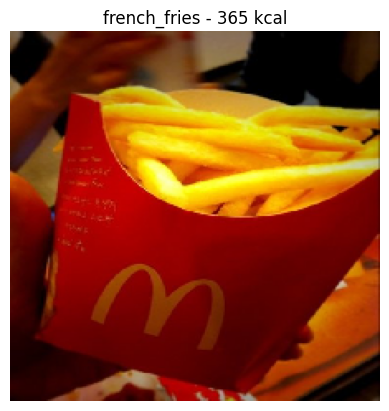

Predicted: french_fries, Estimated Calories: 365 kcal


In [100]:
# List of images to predict
images = [
    r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\cup_cakes\91387.jpg',
    r'C:\Users\Dell.com\Desktop\ml\project 9\test_mini\french_fries\204100.jpg'
]

# Run prediction test with calorie estimation
predict_class_and_calories(model_best, images, True)